# FEATURE EXTRACTION

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.applications import EfficientNetB0

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
dataset = "/kaggle/input/agricultural-pests-image-dataset"

In [4]:
dataset_total=tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
)

Found 5494 files belonging to 12 classes.


In [5]:
classes=dataset_total.class_names
classes

['ants',
 'bees',
 'beetle',
 'catterpillar',
 'earthworms',
 'earwig',
 'grasshopper',
 'moth',
 'slug',
 'snail',
 'wasp',
 'weevil']

In [6]:
len(dataset)

46

earthworms


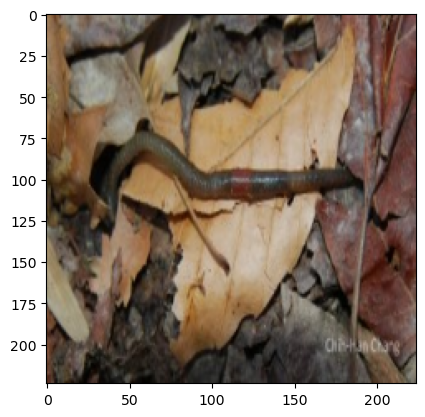

beetle


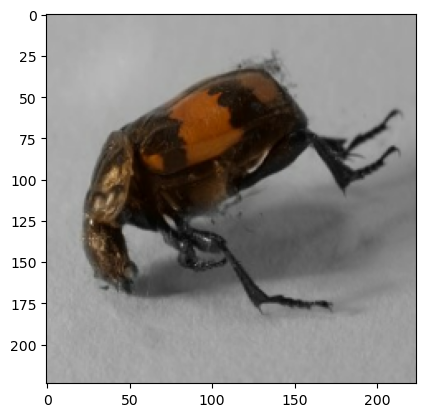

bees


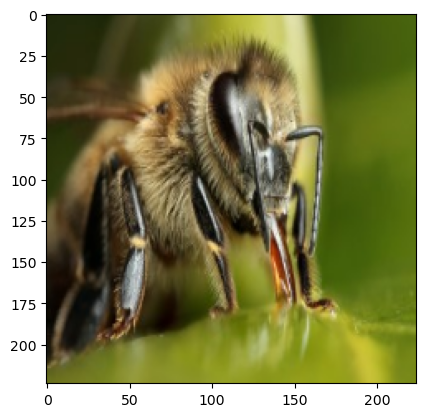

moth


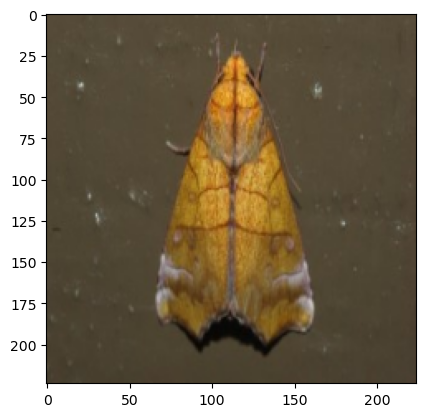

snail


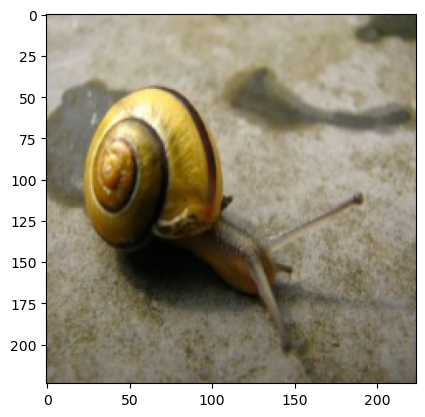

earthworms


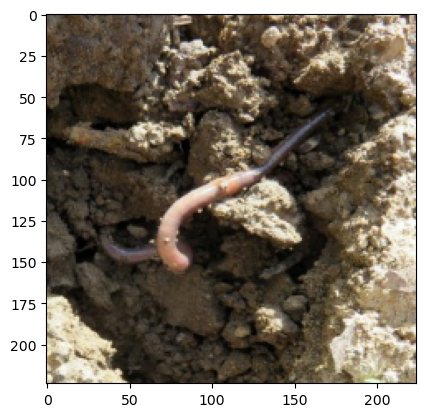

weevil


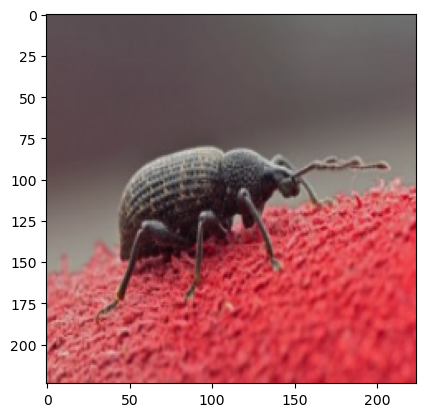

ants


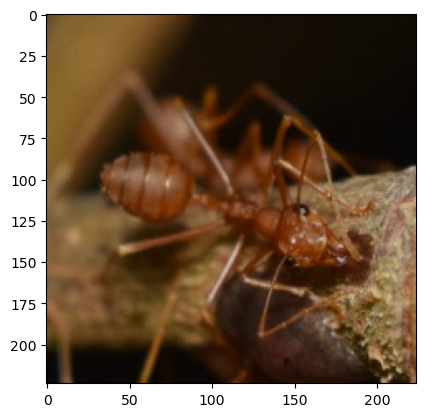

bees


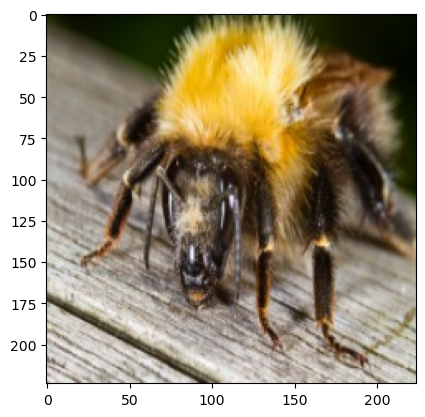

weevil


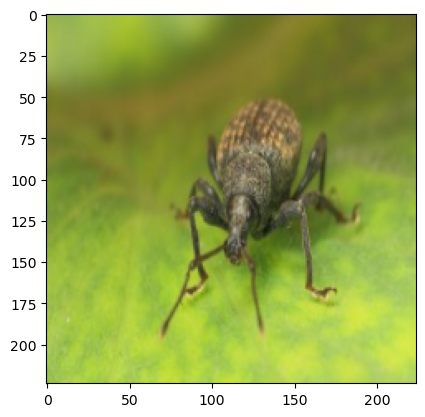

weevil


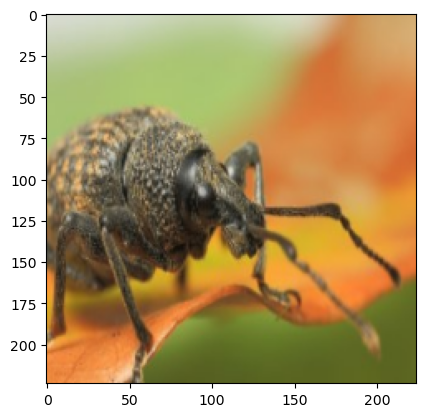

wasp


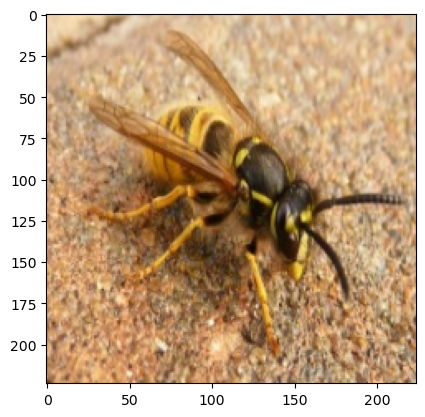

earwig


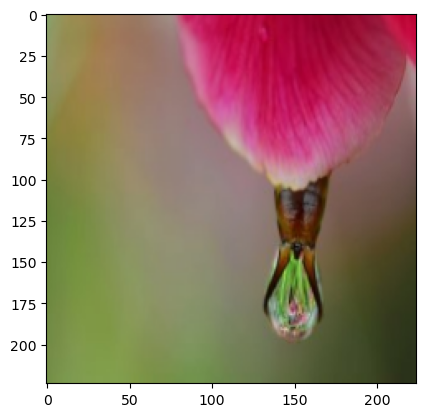

weevil


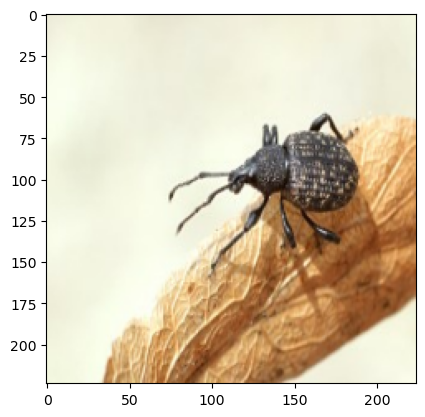

ants


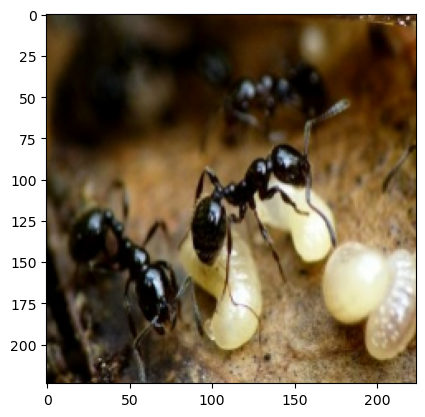

beetle


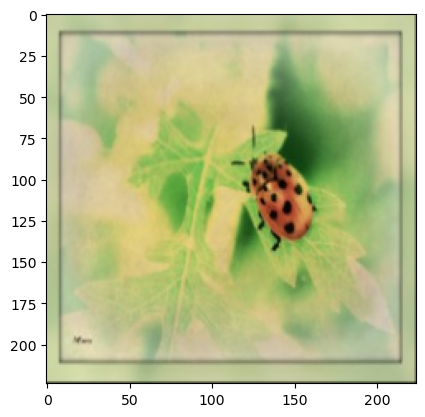

catterpillar


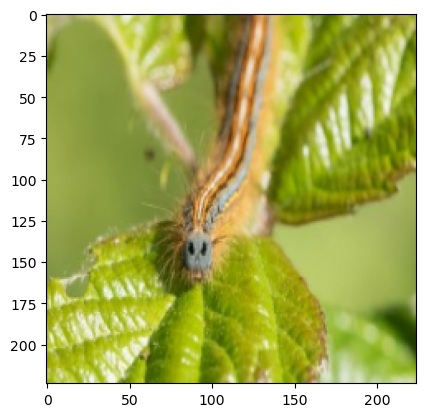

catterpillar


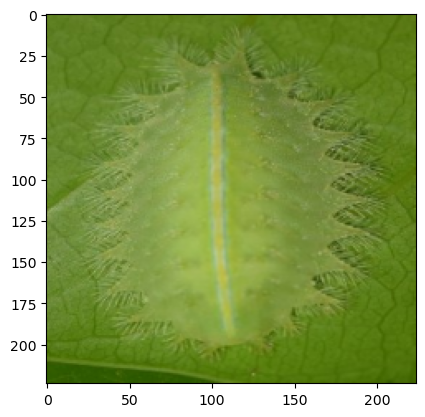

wasp


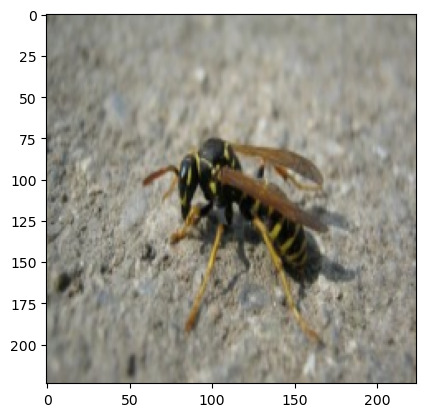

bees


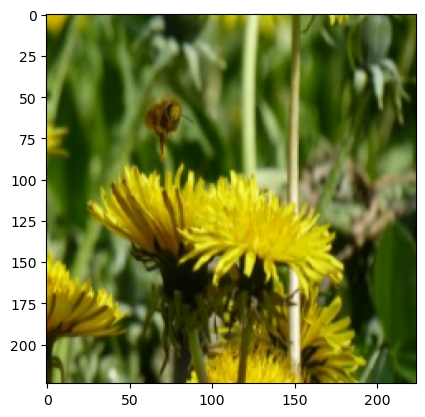

earthworms


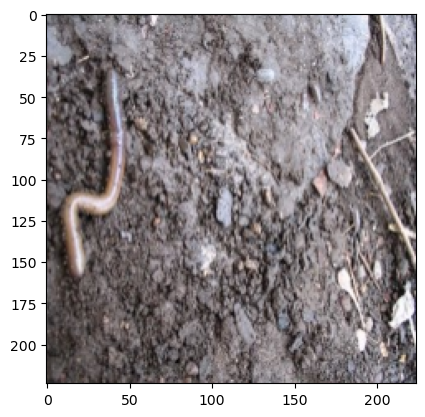

grasshopper


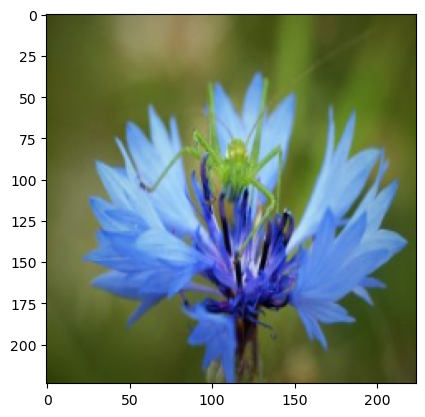

ants


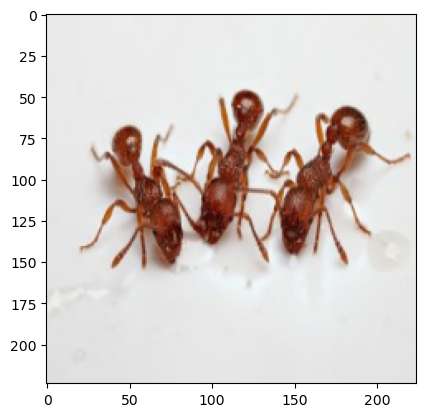

wasp


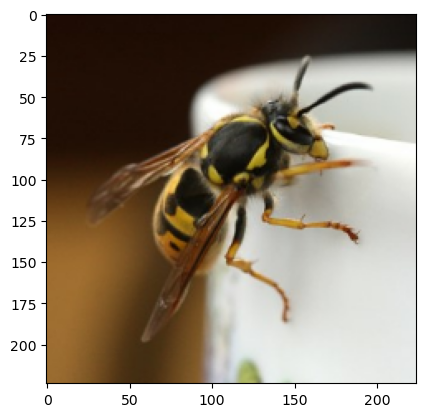

catterpillar


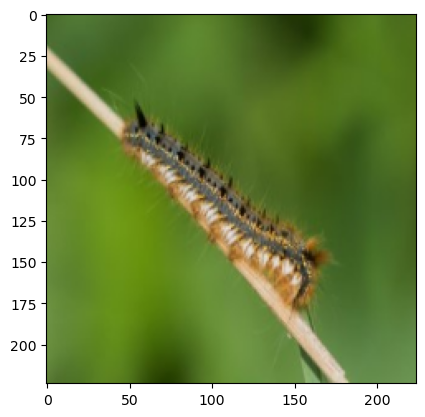

ants


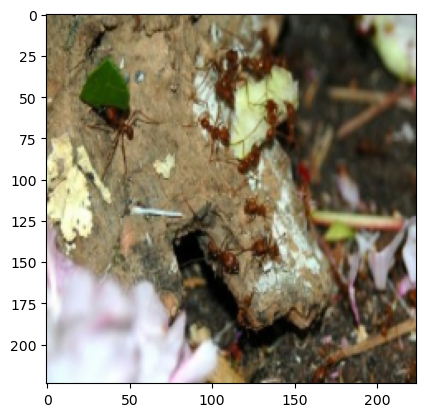

grasshopper


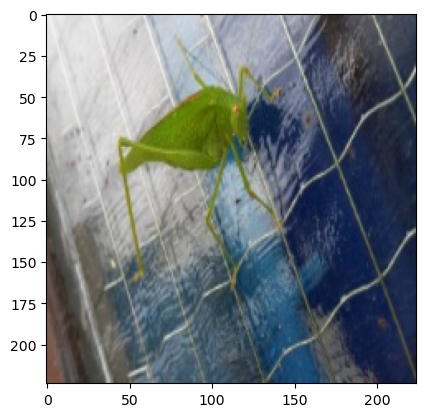

bees


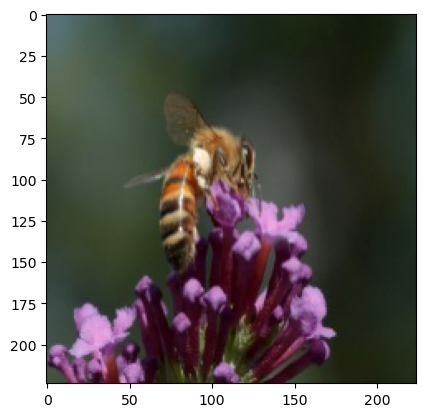

slug


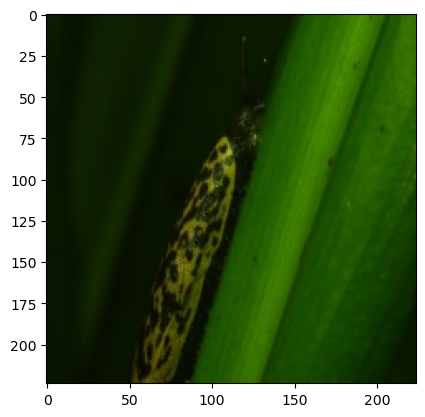

earthworms


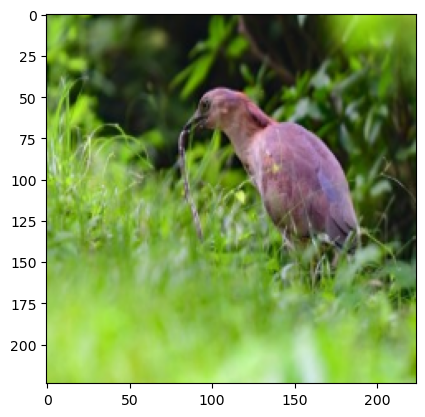

catterpillar


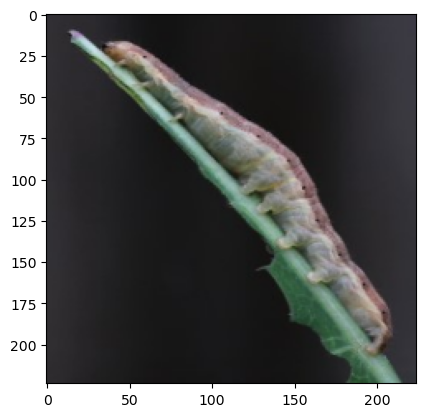

slug


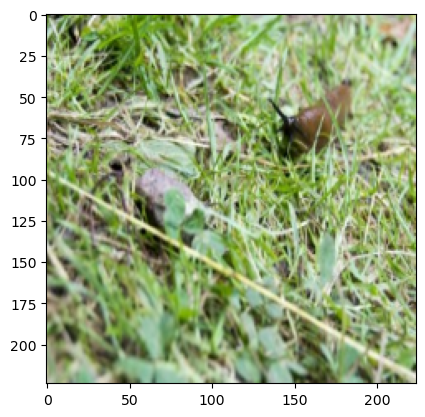

In [17]:
for image,label in dataset_total.take(1):
    for i in range(32):
        plt.imshow(image[i].numpy().astype('uint8'))
        l=label[i].numpy()
        print(classes[l])
        plt.show()

In [7]:
X = np.concatenate([image_batch for image_batch, _ in dataset_total])
y = np.concatenate([label_batch for _, label_batch in dataset_total])

# MACHINE LEARNING MODEL

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

In [10]:
model = RandomForestClassifier(n_estimators=100)  # Create a Random Forest classifier
model.fit(X_train_flattened, y_train)  # Train the model on the training data

RandomForestClassifier()

In [16]:
y_pred = model.predict(X_test_flattened)
print(y_pred)

[3 9 1 ... 1 2 1]


In [15]:
model.score(X_train_flattened,y_train)

0.999089874857793

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.10009099181073704
